In [1]:
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier

In [2]:
# %pip install shap
# %pip install tensorflow
# %pip install --upgrade jupyter
# %pip install --upgrade ipywidgets

### 📌 **Redes Neurais: conjunto sem balanceamento**

In [3]:
with open('../sample_data/census.pkl', 'rb') as f:
    X_census_training_set, y_census_training_set, X_census_test_set, y_census_test_set, df_transformed, one_hot_encoder_census = pk.load(f)

In [4]:
X_census_training_set.shape, y_census_training_set.shape

((27656, 41), (27656,))

In [5]:
X_census_test_set.shape, y_census_test_set.shape

((4881, 41), (4881,))

In [6]:
(41 + 1) / 2

21.0

In [7]:
neural_network = MLPClassifier(verbose = True, max_iter = 1000, tol = 0.000010, hidden_layer_sizes = (14,14,14))
neural_network.fit(X_census_training_set, y_census_training_set)

Iteration 1, loss = 0.47104240
Iteration 2, loss = 0.38681825
Iteration 3, loss = 0.37454916
Iteration 4, loss = 0.36788736
Iteration 5, loss = 0.36303741
Iteration 6, loss = 0.35983569
Iteration 7, loss = 0.35745798
Iteration 8, loss = 0.35557521
Iteration 9, loss = 0.35435447
Iteration 10, loss = 0.35365491
Iteration 11, loss = 0.35286959
Iteration 12, loss = 0.35222405
Iteration 13, loss = 0.35150400
Iteration 14, loss = 0.35073240
Iteration 15, loss = 0.35076913
Iteration 16, loss = 0.35030778
Iteration 17, loss = 0.34957196
Iteration 18, loss = 0.34899046
Iteration 19, loss = 0.34783541
Iteration 20, loss = 0.34757244
Iteration 21, loss = 0.34671625
Iteration 22, loss = 0.34637332
Iteration 23, loss = 0.34598580
Iteration 24, loss = 0.34510707
Iteration 25, loss = 0.34497674
Iteration 26, loss = 0.34553204
Iteration 27, loss = 0.34451746
Iteration 28, loss = 0.34400923
Iteration 29, loss = 0.34423008
Iteration 30, loss = 0.34322608
Iteration 31, loss = 0.34295688
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(14, 14, 14), max_iter=1000, tol=1e-05,
              verbose=True)

In [8]:
predictor = neural_network.predict(X_census_test_set)
predictor

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [9]:
y_census_test_set

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

In [11]:
accuracy_score(y_census_test_set, predictor)

0.8393771768080311

In [12]:
print(classification_report(y_census_test_set, predictor))

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.90      3653
        >50K       0.72      0.59      0.65      1228

    accuracy                           0.84      4881
   macro avg       0.80      0.76      0.77      4881
weighted avg       0.83      0.84      0.83      4881



0.8393771768080311

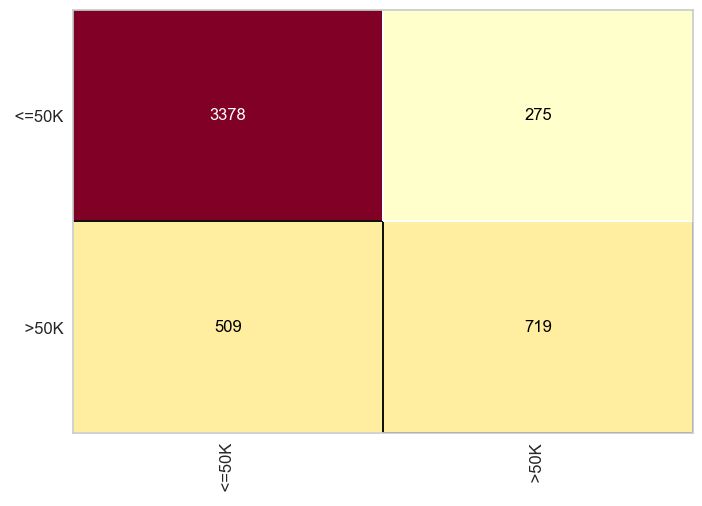

In [13]:
cm = ConfusionMatrix(neural_network)
cm.fit(X_census_training_set, y_census_training_set)
cm.score(X_census_test_set, y_census_test_set)

### 📌 **Árvore de Decisão: conjunto com balanceamento do tipo 'Random Over Sampling'**

In [14]:
with open('../sample_data/census_ros.pkl', 'rb') as f_ros:
    X_census_training_set_ros, y_census_training_set_ros, X_census_test_set_ros, y_census_test_set_ros, df_transformed, one_hot_encoder_census = pk.load(f_ros)

In [15]:
X_census_training_set_ros.shape, y_census_training_set_ros.shape

((42090, 41), (42090,))

In [16]:
X_census_test_set_ros.shape, y_census_test_set_ros.shape

((4881, 41), (4881,))

In [17]:
neural_network_ros = MLPClassifier(verbose = True, max_iter = 1000, tol = 0.000010, hidden_layer_sizes = (14,14,14))
neural_network_ros.fit(X_census_training_set_ros, y_census_training_set_ros)

Iteration 1, loss = 0.67862719
Iteration 2, loss = 0.46219218
Iteration 3, loss = 0.43817963
Iteration 4, loss = 0.43172697
Iteration 5, loss = 0.42656409
Iteration 6, loss = 0.42537310
Iteration 7, loss = 0.42402987
Iteration 8, loss = 0.42249646
Iteration 9, loss = 0.42180244
Iteration 10, loss = 0.42028182
Iteration 11, loss = 0.41902812
Iteration 12, loss = 0.41836286
Iteration 13, loss = 0.41713514
Iteration 14, loss = 0.41645720
Iteration 15, loss = 0.41641172
Iteration 16, loss = 0.41501368
Iteration 17, loss = 0.41454228
Iteration 18, loss = 0.41476099
Iteration 19, loss = 0.41390454
Iteration 20, loss = 0.41574169
Iteration 21, loss = 0.41319217
Iteration 22, loss = 0.41422915
Iteration 23, loss = 0.41358854
Iteration 24, loss = 0.41189568
Iteration 25, loss = 0.41266521
Iteration 26, loss = 0.41217598
Iteration 27, loss = 0.41036305
Iteration 28, loss = 0.41158907
Iteration 29, loss = 0.41064960
Iteration 30, loss = 0.41067192
Iteration 31, loss = 0.41005246
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(14, 14, 14), max_iter=1000, tol=1e-05,
              verbose=True)

In [18]:
predictor_ros = neural_network_ros.predict(X_census_test_set_ros)
predictor_ros

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [19]:
y_census_test_set_ros

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [20]:
accuracy_score(y_census_test_set_ros, predictor_ros)

0.7979922147101004

In [21]:
print(classification_report(y_census_test_set_ros, predictor_ros))

              precision    recall  f1-score   support

       <=50K       0.94      0.78      0.85      3653
        >50K       0.57      0.84      0.68      1228

    accuracy                           0.80      4881
   macro avg       0.75      0.81      0.77      4881
weighted avg       0.84      0.80      0.81      4881



0.7979922147101004

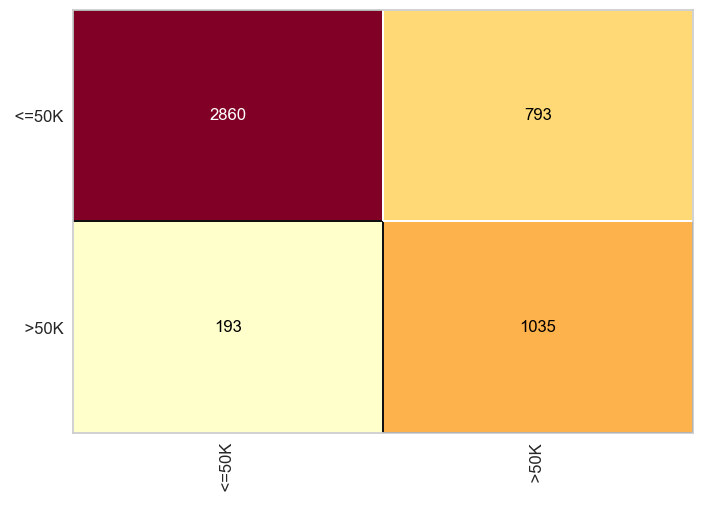

In [22]:
cm = ConfusionMatrix(neural_network_ros)
cm.fit(X_census_training_set_ros, y_census_training_set_ros)
cm.score(X_census_test_set_ros, y_census_test_set_ros)

### 📌 **Árvore de Decisão: conjunto com balanceamento do tipo 'SMOTE'**

In [23]:
with open('../sample_data/census_smote.pkl', 'rb') as f_smote:
    X_census_training_set_smote, y_census_training_set_smote, X_census_test_set_smote, y_census_test_set_smote, df_transformed, one_hot_encoder_census = pk.load(f_smote)

In [24]:
X_census_training_set_smote.shape, y_census_training_set_smote.shape

((42090, 41), (42090,))

In [25]:
X_census_test_set_smote.shape, y_census_test_set_smote.shape

((4881, 41), (4881,))

In [26]:
neural_network_smote = MLPClassifier(verbose = True, max_iter = 1000, tol = 0.000010, hidden_layer_sizes = (14,14,14))
neural_network_smote.fit(X_census_training_set_smote, y_census_training_set_smote)

Iteration 1, loss = 0.54814598
Iteration 2, loss = 0.43314001
Iteration 3, loss = 0.41372099
Iteration 4, loss = 0.40864848
Iteration 5, loss = 0.40556271
Iteration 6, loss = 0.40307146
Iteration 7, loss = 0.40150942
Iteration 8, loss = 0.40118794
Iteration 9, loss = 0.39994207
Iteration 10, loss = 0.39837992
Iteration 11, loss = 0.39962645
Iteration 12, loss = 0.39794329
Iteration 13, loss = 0.39644356
Iteration 14, loss = 0.39811709
Iteration 15, loss = 0.39602626
Iteration 16, loss = 0.39582614
Iteration 17, loss = 0.39448116
Iteration 18, loss = 0.39446211
Iteration 19, loss = 0.39476114
Iteration 20, loss = 0.39301440
Iteration 21, loss = 0.39269590
Iteration 22, loss = 0.39438801
Iteration 23, loss = 0.39306016
Iteration 24, loss = 0.39171610
Iteration 25, loss = 0.39110413
Iteration 26, loss = 0.39116871
Iteration 27, loss = 0.38945222
Iteration 28, loss = 0.39007599
Iteration 29, loss = 0.39009518
Iteration 30, loss = 0.38928261
Iteration 31, loss = 0.38956606
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(14, 14, 14), max_iter=1000, tol=1e-05,
              verbose=True)

In [27]:
predictor_smote = neural_network_smote.predict(X_census_test_set_smote)
predictor_smote

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [28]:
y_census_test_set_smote

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [29]:
accuracy_score(y_census_test_set_smote, predictor_smote)

0.7992214710100389

In [30]:
print(classification_report(y_census_test_set_smote, predictor_smote))

              precision    recall  f1-score   support

       <=50K       0.93      0.79      0.85      3653
        >50K       0.57      0.83      0.68      1228

    accuracy                           0.80      4881
   macro avg       0.75      0.81      0.77      4881
weighted avg       0.84      0.80      0.81      4881



0.7992214710100389

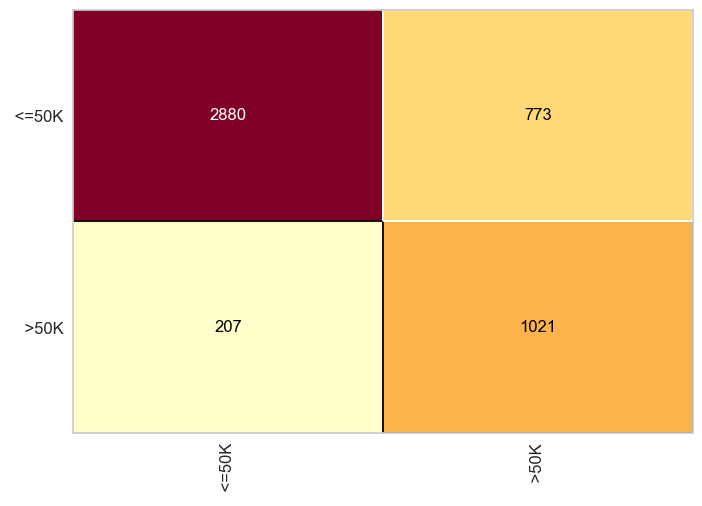

In [31]:
cm = ConfusionMatrix(neural_network_smote)
cm.fit(X_census_training_set_smote, y_census_training_set_smote)
cm.score(X_census_test_set_smote, y_census_test_set_smote)

In [32]:
weights_first_hidden_layer = neural_network.coefs_[0]

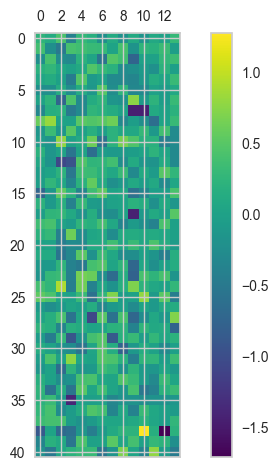

In [33]:
fig, ax = plt.subplots()
cax = ax.matshow(weights_first_hidden_layer, cmap='viridis')
fig.colorbar(cax)
plt.show()

### 📌 **Árvore de Decisão: conjunto com balanceamento do tipo 'Random Under Sampling'**

In [34]:
with open('../sample_data/census_rus.pkl', 'rb') as f_rus:
    X_census_training_set_rus, y_census_training_set_rus, X_census_test_set_rus, y_census_test_set_rus, df_transformed, one_hot_encoder_census = pk.load(f_rus)

In [35]:
X_census_training_set_rus.shape, y_census_training_set_rus.shape

((13222, 41), (13222,))

In [36]:
X_census_test_set_rus.shape, y_census_test_set_rus.shape

((4881, 41), (4881,))

In [37]:
neural_network_rus = MLPClassifier(verbose = True, max_iter = 1000, tol = 0.000010, hidden_layer_sizes = (14,14,14))
neural_network_rus.fit(X_census_training_set_rus, y_census_training_set_rus)

Iteration 1, loss = 0.70586411
Iteration 2, loss = 0.50374956
Iteration 3, loss = 0.45869209
Iteration 4, loss = 0.44502168
Iteration 5, loss = 0.43981183
Iteration 6, loss = 0.44001017
Iteration 7, loss = 0.43348116
Iteration 8, loss = 0.43362431
Iteration 9, loss = 0.43289795
Iteration 10, loss = 0.43115801
Iteration 11, loss = 0.42983467
Iteration 12, loss = 0.42694077
Iteration 13, loss = 0.42638019
Iteration 14, loss = 0.42911511
Iteration 15, loss = 0.42465779
Iteration 16, loss = 0.42370112
Iteration 17, loss = 0.42632379
Iteration 18, loss = 0.42374485
Iteration 19, loss = 0.42273610
Iteration 20, loss = 0.42469873
Iteration 21, loss = 0.42243870
Iteration 22, loss = 0.42149576
Iteration 23, loss = 0.42230929
Iteration 24, loss = 0.42055053
Iteration 25, loss = 0.42226985
Iteration 26, loss = 0.42129450
Iteration 27, loss = 0.42070455
Iteration 28, loss = 0.42095718
Iteration 29, loss = 0.42161492
Iteration 30, loss = 0.41992027
Iteration 31, loss = 0.42123470
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(14, 14, 14), max_iter=1000, tol=1e-05,
              verbose=True)

In [38]:
predictor_rus = neural_network_rus.predict(X_census_test_set_rus)
predictor_rus

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [39]:
y_census_test_set_rus

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [40]:
accuracy_score(y_census_test_set_rus, predictor_rus)

0.7887727924605613

In [41]:
print(classification_report(y_census_test_set_rus, predictor_rus))

              precision    recall  f1-score   support

       <=50K       0.94      0.77      0.84      3653
        >50K       0.55      0.85      0.67      1228

    accuracy                           0.79      4881
   macro avg       0.74      0.81      0.76      4881
weighted avg       0.84      0.79      0.80      4881



0.7887727924605613

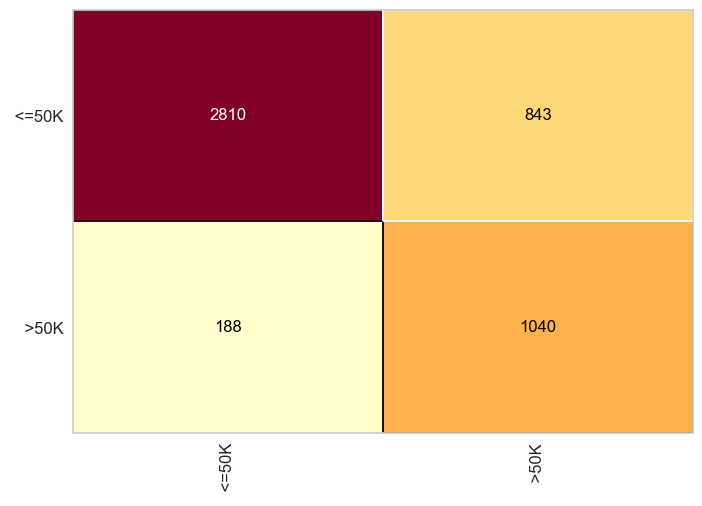

In [42]:
cm = ConfusionMatrix(neural_network_rus)
cm.fit(X_census_training_set_rus, y_census_training_set_rus)
cm.score(X_census_test_set_rus, y_census_test_set_rus)

### 📌 **Árvore de Decisão: conjunto com balanceamento do tipo 'NearMiss'**

In [43]:
with open('../sample_data/census_nearmiss.pkl', 'rb') as f_nearmiss:
    X_census_training_set_nearmiss, y_census_training_set_nearmiss, X_census_test_set_nearmiss, y_census_test_set_nearmiss, df_transformed, one_hot_encoder_census = pk.load(f_nearmiss)

In [44]:
X_census_training_set_nearmiss.shape, y_census_training_set_nearmiss.shape

((13222, 41), (13222,))

In [45]:
X_census_test_set_nearmiss.shape, y_census_test_set_nearmiss.shape

((4881, 41), (4881,))

In [46]:
neural_network_nearmiss = MLPClassifier(verbose = True, max_iter = 1000, tol = 0.000010, hidden_layer_sizes = (14,14,14))
neural_network_nearmiss.fit(X_census_training_set_nearmiss, y_census_training_set_nearmiss)

Iteration 1, loss = 0.74817117
Iteration 2, loss = 0.66828696
Iteration 3, loss = 0.64098757
Iteration 4, loss = 0.61525956
Iteration 5, loss = 0.59412566
Iteration 6, loss = 0.58481043
Iteration 7, loss = 0.57965511
Iteration 8, loss = 0.57707834
Iteration 9, loss = 0.57403806
Iteration 10, loss = 0.57332139
Iteration 11, loss = 0.56990934
Iteration 12, loss = 0.57120684
Iteration 13, loss = 0.57030723
Iteration 14, loss = 0.56993286
Iteration 15, loss = 0.56817516
Iteration 16, loss = 0.56562451
Iteration 17, loss = 0.56807187
Iteration 18, loss = 0.56576704
Iteration 19, loss = 0.56425608
Iteration 20, loss = 0.56376524
Iteration 21, loss = 0.56263030
Iteration 22, loss = 0.56297267
Iteration 23, loss = 0.56264763
Iteration 24, loss = 0.56277354
Iteration 25, loss = 0.56108681
Iteration 26, loss = 0.56130324
Iteration 27, loss = 0.56475838
Iteration 28, loss = 0.56040236
Iteration 29, loss = 0.56119224
Iteration 30, loss = 0.56196472
Iteration 31, loss = 0.55835731
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(14, 14, 14), max_iter=1000, tol=1e-05,
              verbose=True)

In [47]:
predictor_nearmiss = neural_network_nearmiss.predict(X_census_test_set_nearmiss)
predictor_nearmiss

array([' >50K', ' <=50K', ' <=50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype='<U6')

In [48]:
y_census_test_set

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [49]:
accuracy_score(y_census_test_set_nearmiss, predictor_nearmiss)

0.6203646793689818

In [50]:
print(classification_report(y_census_test_set_nearmiss, predictor_nearmiss))

              precision    recall  f1-score   support

       <=50K       0.88      0.57      0.69      3653
        >50K       0.38      0.77      0.51      1228

    accuracy                           0.62      4881
   macro avg       0.63      0.67      0.60      4881
weighted avg       0.75      0.62      0.65      4881



0.6203646793689818

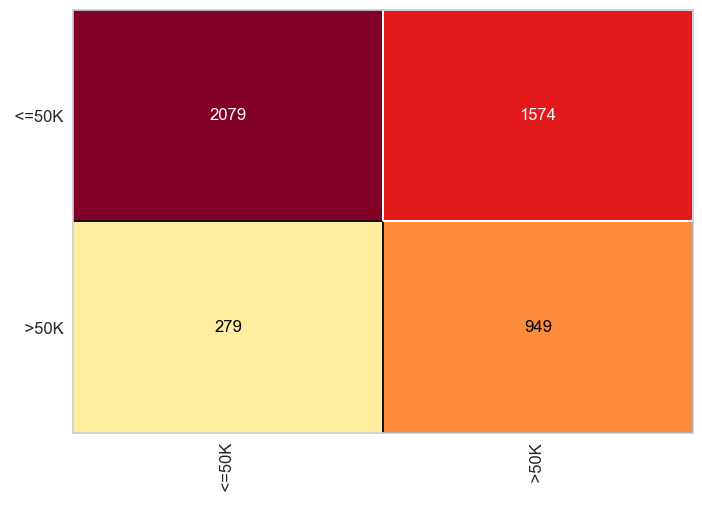

In [51]:
cm = ConfusionMatrix(neural_network_nearmiss)
cm.fit(X_census_training_set_nearmiss, y_census_training_set_nearmiss)
cm.score(X_census_test_set_nearmiss, y_census_test_set_nearmiss)